In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Loading dataset**

In [72]:
df = pd.read_csv('/content/customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1215,9897-KXHCM,Female,0,Yes,Yes,3,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.30,250.05,Yes
1629,3533-UVMOM,Male,0,Yes,No,68,Yes,No,DSL,Yes,...,Yes,No,No,Yes,Two year,No,Bank transfer (automatic),70.95,4741.45,No
5163,3472-OAOOR,Male,0,Yes,Yes,19,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,34.95,610.2,No
3498,7730-IUTDZ,Male,0,No,No,43,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.20,3198.6,Yes
4686,8024-XNAFQ,Female,1,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),107.40,7748.75,No


**droping customerID column as it is of no use**

In [73]:
#step 1:data exploration ie cust_id is useless
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [74]:
#TotalCharges         in str
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [75]:
df.MonthlyCharges.values#numbers

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [76]:
# pd.to_numeric(df.TotalCharges)


**converting TotalCharges to float as it is in object type**

In [77]:
#to tackle spaces in TotalCharges
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()   #put na if space in that col

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [78]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]   #tota charges are nulls df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [79]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [80]:
df.shape

(7043, 20)

In [81]:
df.iloc[488].TotalCharges #iloc is like indexing in array  (488 row)

' '

In [82]:
#drop 11 rows
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [83]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

<ipython-input-83-01816c9a1a9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [84]:
df1.TotalCharges.dtypes

dtype('float64')

TENURE - HOW CUSTOMER LOYAL IS

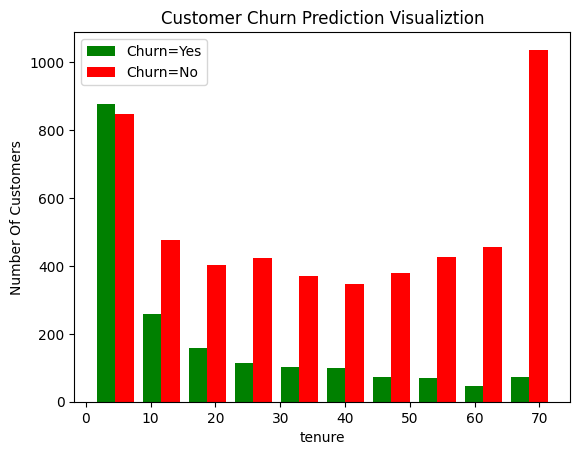

In [85]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure #not leaving
tenure_churn_Yes = df1[df1.Churn == 'Yes'].tenure # leaving IN MONTHS


plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_Yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
#AROUND 1000CUST ARE NOT LEAVAING WHERE TENURE =70

In [86]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}: {df[column].unique()}')

In [87]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [88]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


<ipython-input-88-911fb1bda1c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-88-911fb1bda1c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [89]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)

<ipython-input-89-0cbc454eee20>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
<ipython-input-89-0cbc454eee20>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
<ipython-input-89-0cbc454eee20>:4: Set

In [90]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [91]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [92]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-92-ba153b6b6960>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-92-ba153b6b6960>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-92-ba15

In [93]:
df1.gender.unique()

array([1, 0])

In [94]:
print_unique_col_values(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [95]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod']) # ONE HOT ENCODING ->it creates 3cols for single InternetService if 1s remain all 0s ans 0s
df2.columns

# df2

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [96]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4775,1,0,1,0,24,1,0,0,1,1,...,False,True,False,True,False,False,False,True,False,False
5440,1,0,1,1,19,1,0,0,0,1,...,True,False,False,True,False,False,True,False,False,False
6076,1,0,1,1,65,1,0,1,1,1,...,True,False,False,False,True,False,True,False,False,False


In [97]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


SCALING /255

In [98]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']#these cols not interms of 1s and 0s
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [99]:
for col in df2:
  print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [100]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
x_train.shape

(5625, 26)

In [102]:
y_train.shape

(5625,)

In [103]:
y_test.shape

(1407,)

In [104]:
y_test[0:5]

,Churn
2660,0
744,0
5579,1
64,1
3287,1


In [105]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2660,0,0,0,1,0.169014,1,0,1,0,0,...,True,False,False,True,False,False,False,True,False,False
744,1,0,0,0,0.056338,1,0,0,0,0,...,True,False,False,True,False,False,False,True,False,False
5579,1,0,1,1,0.971831,1,1,1,1,1,...,False,True,False,False,False,True,True,False,False,False
64,1,0,0,0,0.112676,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3287,0,0,1,1,0.253521,1,1,0,0,0,...,False,True,False,False,True,False,False,False,True,False


In [106]:
x_test.shape

(1407, 26)

In [107]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=100)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

In [108]:
clf.score(x_test,y_test)

0.7114427860696517

In [109]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier()
clf_forest.fit(x_train,y_train)

RandomForestClassifier()

In [110]:
clf_forest.score(x_test,y_test)

0.7725657427149965

In [111]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=30)

In [112]:
ada_boost_clf.score(x_test,y_test)

0.7910447761194029

In [113]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([    #each neuron in i/p layer accept 1 feature
    keras.layers.Dense(20, input_shape=(26,), activation='relu'), #20 hidden
    keras.layers.Dense(1, activation='sigmoid'),
])
#ML is an art of experiments there is no like golden rule here

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - accuracy: 0.7068 - loss: 0.5800
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.7945 - loss: 0.4387
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8051 - loss: 0.4139
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.8005 - loss: 0.4203
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.8172 - loss: 0.4074
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.8077 - loss: 0.4073
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.8028 - loss: 0.4217
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.8045 - loss: 0.4141
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.8167 - loss: 0.4037
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.8187 - loss: 0.4010
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.8083 - loss: 0.4088
Epoch 12/50
176/176 ━━━━━━━━━━

In [114]:
model.evaluate(x_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.7969 - loss: 0.4352


[0.44227853417396545, 0.7889125943183899]

In [115]:
ypred = model.predict(x_test)
ypred[:5] #<0.5 means 0

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.14174142],
       [0.4087761 ],
       [0.01403251],
       [0.71766174],
       [0.5009575 ]], dtype=float32)

In [116]:
y_pred =[]
for element in ypred:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [117]:
y_pred[0:7]

[0, 0, 0, 1, 1, 1, 0]

In [118]:
y_test[0:7]

,Churn
2660,0
744,0
5579,1
64,1
3287,1
816,1
2670,0


In [119]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       999
           1       0.68      0.52      0.59       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

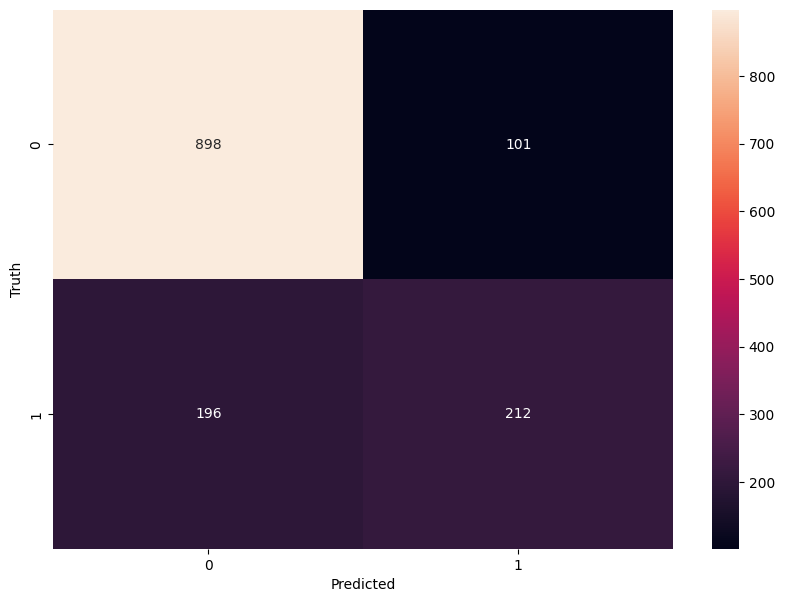

In [120]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#

ACCURACY

In [121]:
round((893+209)/(893+199+209+106),2)

0.78

# Precision    for 0 class  i.e Precision for customer who did not churn

In [122]:
893/(893+106)

0.8938938938938938

# Precision    for 1 class  i.e Precision for customer who actually churned

In [123]:
209/(209+209)

0.5

# Recall for 0 class ie total correct pred for 0 class / total 0th samples

In [124]:
875/(875+124)

0.8758758758758759

## Recall for 1 class ie total correct pred for 1 class / total 1th samples

In [125]:
240/(240+168)

0.5882352941176471

**SMOTE** - To Handle imbalance dataset

In [126]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Dividing by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [127]:
df_class_0.shape

(5163, 27)

In [128]:
df_class_1.shape

(1869, 27)

In [129]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [130]:
#imbalanced learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

,count
Churn,
0,5163
1,5163


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [132]:
y_train.value_counts()

,count
Churn,
1,4130
0,4130


In [133]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report




def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [134]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)
#259 -> 32 batch miniBatch

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.7019 - loss: 0.5884
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.7762 - loss: 0.4729
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.7786 - loss: 0.4691
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.7750 - loss: 0.4703
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.7793 - loss: 0.4605
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.7917 - loss: 0.4474
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8005 - loss: 0.4350  
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.7977 - loss: 0.4352
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.7984 - loss: 0.4346
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8047 - loss: 0.4310
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.7936 - loss: 0.4406
Epoch 12/100
259/259 ━━━━━━━━━━